In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir="E:\data_science\Data -  Logistic Regression\Data"
os.chdir(data_dir)

In [3]:
review_data=pd.read_table('movie_reviews.tsv',sep="\t")

In [4]:
review_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer()

In [9]:
tfidf_matrix = vectorizer.fit_transform(review_data['review'].tolist())

In [10]:
tfidf_matrix.shape

(25000, 74849)

In [11]:
y=review_data["sentiment"]

In [12]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(tfidf_matrix,y,test_size=0.2,random_state=200)

In [14]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [15]:
mod=clf.fit(X_train, y_train)

In [23]:
mod.predict_proba(X_test)

array([[0.21078576, 0.78921424],
       [0.7931843 , 0.2068157 ],
       [0.95738208, 0.04261792],
       ...,
       [0.11150251, 0.88849749],
       [0.92334755, 0.07665245],
       [0.94916074, 0.05083926]])

In [24]:
import sklearn.metrics as metrics

In [25]:
metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.96510706e-04, 3.96510706e-04, 7.93021412e-04,
        7.93021412e-04, 1.18953212e-03, 1.18953212e-03, 1.58604282e-03,
        1.58604282e-03, 1.98255353e-03, 1.98255353e-03, 2.37906423e-03,
        2.37906423e-03, 2.77557494e-03, 2.77557494e-03, 3.17208565e-03,
        3.17208565e-03, 4.36161776e-03, 4.36161776e-03, 4.75812847e-03,
        4.75812847e-03, 5.15463918e-03, 5.15463918e-03, 5.55114988e-03,
        5.55114988e-03, 5.94766059e-03, 5.94766059e-03, 6.34417129e-03,
        6.34417129e-03, 6.74068200e-03, 6.74068200e-03, 7.13719270e-03,
        7.13719270e-03, 7.53370341e-03, 7.53370341e-03, 7.93021412e-03,
        7.93021412e-03, 8.32672482e-03, 8.32672482e-03, 8.72323553e-03,
        8.72323553e-03, 9.11974623e-03, 9.11974623e-03, 9.51625694e-03,
        9.51625694e-03, 9.91276764e-03, 9.91276764e-03, 1.03092784e-02,
        1.03092784e-02, 1.07057891e-02, 1.07057891e-02, 1.110229

In [26]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

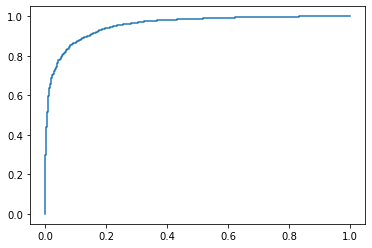

In [27]:
plt.plot(fpr,tpr,"-")

In [28]:
metrics.roc_auc_score(y_test,mod.predict_proba(X_test)[:,1])

0.9553984660572115

In [30]:
metrics.confusion_matrix(y_train,mod.predict(X_train))

array([[9255,  723],
       [ 597, 9425]], dtype=int64)

In [41]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=3,shuffle=False)
kf.split(tfidf_matrix)

<generator object _BaseKFold.split at 0x0000000021261C80>

In [43]:
for train_index, test_index in kf.split(tfidf_matrix):
    train_X, test_X = tfidf_matrix[train_index], tfidf_matrix[test_index]
    train_y, test_y = review_data["sentiment"][train_index], review_data["sentiment"][test_index]
    model = clf.fit(train_X, train_y)
    print(metrics.roc_auc_score(test_y, model.predict_proba(test_X)[:,1]))

0.9546862510769093
0.9516976832247768
0.953031380273726
